In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [427]:
df = pd.read_csv("dataset.csv")
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32


In [428]:
df.shape

(8535, 6)

In [429]:
df.isna().sum()

tanggal                 135
wilayah                 135
waktu                   135
cuaca                   135
kelembaban_persen       135
suhu_derajat_celcius    135
dtype: int64

In [430]:
df.dropna(inplace=True)

In [431]:
df.shape

(8400, 6)

In [432]:
df["cuaca"].value_counts()

Cerah Berawan     3307
Berawan           2758
Hujan Lokal       1006
Hujan Ringan       431
Cerah              427
Hujan Petir        137
Berawan Tebal      115
Hujan Sedang       110
Cerah Berawan       32
Cerah               24
Berawan             19
Hujan Lokal         13
 Berawan             3
Hujan                2
Cerah berawan        2
Hujan Ringan         2
Cerah Berawah        2
Cerah                1
Cerah Berawn         1
Hujan Petir          1
Hujan Sedang         1
Cerang Berawan       1
Hujan Ringanl        1
Berawa               1
Hujang Sedang        1
Hujan Loka           1
Beawan               1
Name: cuaca, dtype: int64

In [433]:
df["cuaca"].replace("Hujan Loka", "Hujan Lokal", inplace=True)
df["cuaca"].replace(" Berawan", "Berawan", inplace=True)
df["cuaca"].replace("Hujan Lokal ", "Hujan Lokal", inplace=True)
df["cuaca"].replace("Hujan Ringan ", "Hujan Ringan", inplace=True)
df["cuaca"].replace("Cerah Berawan ", "Cerah Berawan", inplace=True)
df["cuaca"].replace("Berawan ", "Berawan", inplace=True)

In [434]:
df["cuaca"].value_counts()

Cerah Berawan     3339
Berawan           2780
Hujan Lokal       1020
Hujan Ringan       433
Cerah              427
Hujan Petir        137
Berawan Tebal      115
Hujan Sedang       110
Cerah               24
Cerah Berawah        2
Hujan                2
Cerah berawan        2
Cerah Berawn         1
Cerang Berawan       1
Beawan               1
Cerah                1
Hujan Petir          1
Hujan Sedang         1
Hujan Ringanl        1
Berawa               1
Hujang Sedang        1
Name: cuaca, dtype: int64

In [435]:
df["cuaca"].replace("Hujan Lokal", "Hujan", inplace=True)
df["cuaca"].replace("Berawan", "Berawan", inplace=True)
df["cuaca"].replace("Hujan Lokal", "Hujan", inplace=True)
df["cuaca"].replace("Hujan Ringan", "Hujan", inplace=True)
df["cuaca"].replace("Berawan Tebal", "Berawan", inplace=True)
df["cuaca"].replace("Hujan Petir", "Hujan", inplace=True)
df["cuaca"].replace("Hujan Sedang", "Hujan", inplace=True)
df["cuaca"].replace("Cerah Berawan", "Cerah", inplace=True)


In [436]:
import re

def cuaca(x):
  if (re.findall("Cerah", x)):
    return 'Cerah'
  elif (re.findall("Hujan", x)):
    return 'Hujan'
  elif (re.findall("Berawan", x)):
    return 'Berawan'
  else:
    return 'Gamasok'

df["cuaca"] = df.cuaca.apply(cuaca)
df["cuaca"].value_counts()



Cerah      3796
Berawan    2896
Hujan      1706
Gamasok       2
Name: cuaca, dtype: int64

In [437]:
df.drop(df[df["cuaca"] == "Gamasok"].index, inplace=True)
df["cuaca"].unique()

array(['Hujan', 'Berawan', 'Cerah'], dtype=object)

In [438]:
df["kelembapan_min"] = df.kelembaban_persen.apply(lambda x: x.split("-")[0])
df["kelembapan_min"] = [x.strip(' ') for x in df["kelembapan_min"]]
df.kelembapan_min.head()
df.kelembapan_min.value_counts()

70    1727
55    1296
65    1272
60    1224
75     839
45     624
50     600
80     480
40     192
35      96
85      48
Name: kelembapan_min, dtype: int64

In [439]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70


In [440]:
df["kelembapan_max"] = df.kelembaban_persen.apply(lambda x: x.split("-")[1])
df["kelembapan_max"] = [x.strip(' ') for x in df["kelembapan_max"]]
df.kelembapan_max.head()
df.kelembapan_max.value_counts()

95     3264
90     2375
85     1128
100    1031
80      504
75       96
Name: kelembapan_max, dtype: int64

In [441]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90


In [442]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]
df.suhu_min.head()
df.suhu_min.value_counts()

24    4102
23    3072
25     576
22     552
21      48
20      24
26      24
Name: suhu_min, dtype: int64

In [443]:
df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]
df.suhu_max.head()
df.suhu_max.value_counts()

33    3431
32    1991
34    1440
31     696
30     360
35     288
29     120
28      72
Name: suhu_max, dtype: int64

In [444]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


In [445]:
df.drop(columns=["kelembaban_persen", "suhu_derajat_celcius", "tanggal"], inplace=True)

In [446]:
df.head(20)

,wilayah,waktu,cuaca,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,Hujan,70,90,24,32
1,Kepulauan Seribu,Pagi,Hujan,70,90,24,32
2,Kepulauan Seribu,Malam,Hujan,70,90,24,32
3,Kepulauan Seribu,Dini Hari,Hujan,70,90,24,32
4,Jakarta Utara,Siang,Hujan,70,90,24,32
5,Jakarta Utara,Pagi,Berawan,70,90,24,32
6,Jakarta Utara,Malam,Berawan,70,90,24,32
7,Jakarta Utara,Dini Hari,Hujan,70,90,24,32
8,Jakarta Timur,Siang,Hujan,70,90,24,32
9,Jakarta Timur,Pagi,Berawan,70,90,24,32


In [447]:
df.shape

(8398, 7)

In [448]:
df.wilayah.value_counts()

Jakarta Utara       1400
Jakarta Timur       1400
Jakarta Selatan     1400
Jakarta Pusat       1400
Kepulauan Seribu    1399
Jakarta Barat       1399
Name: wilayah, dtype: int64

In [449]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

le = LabelEncoder()
df2["wilayah"] = le.fit_transform(df2.wilayah)
df2["waktu"] = le.fit_transform(df2.waktu)
df2["cuaca"] = le.fit_transform(df2.cuaca)

In [450]:
df.head(20)

,wilayah,waktu,cuaca,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,Hujan,70,90,24,32
1,Kepulauan Seribu,Pagi,Hujan,70,90,24,32
2,Kepulauan Seribu,Malam,Hujan,70,90,24,32
3,Kepulauan Seribu,Dini Hari,Hujan,70,90,24,32
4,Jakarta Utara,Siang,Hujan,70,90,24,32
5,Jakarta Utara,Pagi,Berawan,70,90,24,32
6,Jakarta Utara,Malam,Berawan,70,90,24,32
7,Jakarta Utara,Dini Hari,Hujan,70,90,24,32
8,Jakarta Timur,Siang,Hujan,70,90,24,32
9,Jakarta Timur,Pagi,Berawan,70,90,24,32


In [451]:
df2.dtypes
df2["kelembapan_min"] = df2.kelembapan_min.astype(float)
df2["kelembapan_max"] = df2.kelembapan_max.astype(float)
df2["suhu_min"] = df2.suhu_min.astype(float)
df2["suhu_max"] = df2.suhu_max.astype(float)

In [452]:
df.wilayah.value_counts()

Jakarta Utara       1400
Jakarta Timur       1400
Jakarta Selatan     1400
Jakarta Pusat       1400
Kepulauan Seribu    1399
Jakarta Barat       1399
Name: wilayah, dtype: int64

## wilayah

5 = kepulauan seribu <br/>
4 = jakarta utara <br/>
3 = jakarta timur <br/>
2 = jakarta selatan <br/>
1 = jakarta pusat <br/>
0 = jakarta barat <br/>

## Waktu

3 = siang <br>
2 = pagi <br>
1 = malam <br>
0 = dini hari

## cuaca

2 = Hujan <br>
1 = Cerah <br>
0 = Berawan

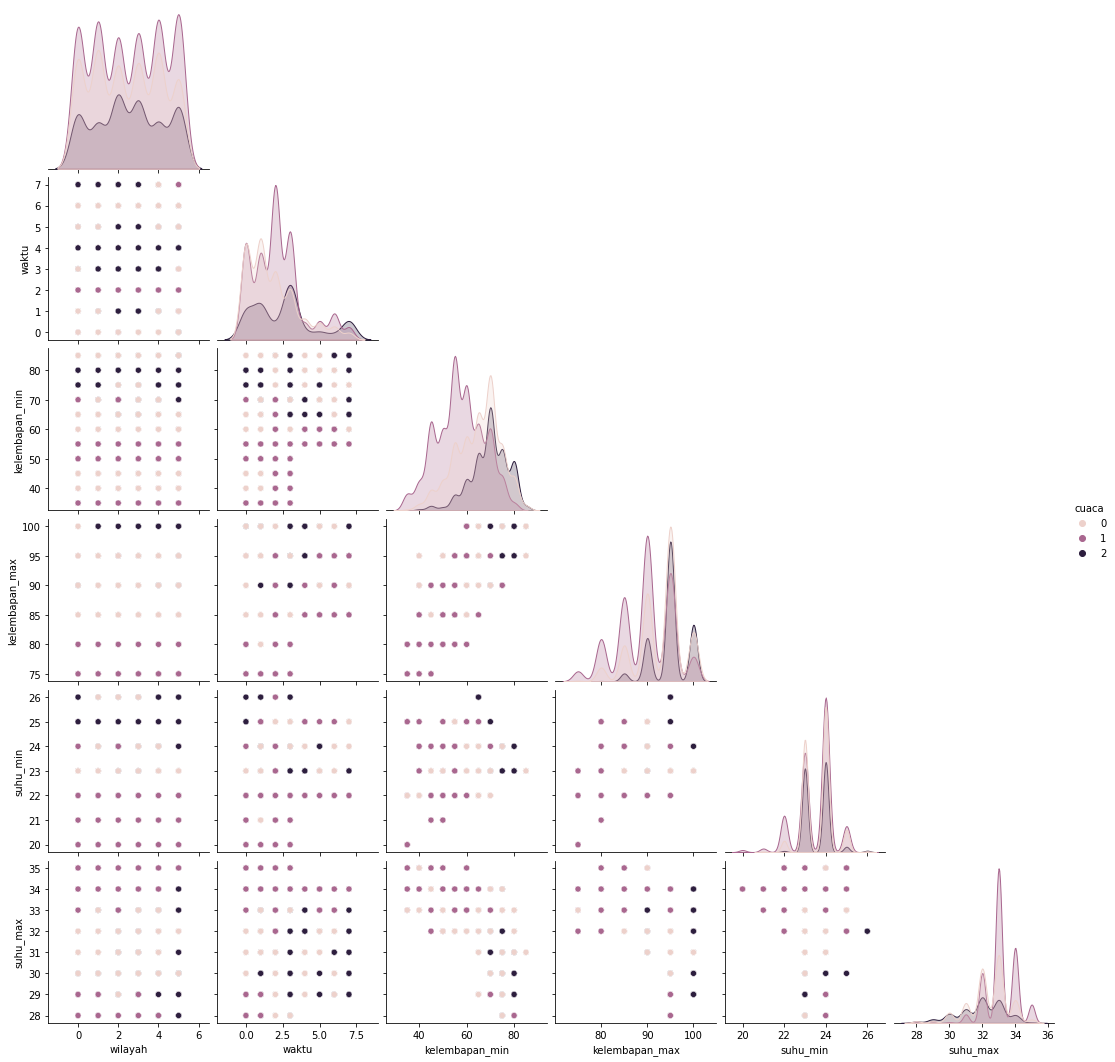

In [453]:
sns.pairplot(df2, hue="cuaca", corner=True)

In [454]:
X = df2.drop(columns=["cuaca"])
y = df2["cuaca"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6718, 6), (1680, 6), (6718,), (1680,))

# Random Forest

In [455]:
params = {'n_estimators': [100, 150, 200], 
          'max_depth': [20, 50, 80],
          'max_features': [0.3, 0.6, 0.8],
          'min_samples_leaf': [1, 5, 10]
}
  

In [456]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(rf, params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


D:\python\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 50, 80],
                         'max_features': [0.3, 0.6, 0.8],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='f1', verbose=1)

In [457]:
print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

{'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 1, 'n_estimators': 100}
[[312 193  74]
 [155 559  46]
 [ 99  56 186]]


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2317
           1       0.86      0.89      0.88      3036
           2       0.84      0.81      0.82      1365

    accuracy                           0.84      6718
   macro avg       0.84      0.83      0.84      6718
weighted avg       0.84      0.84      0.84      6718



              precision    recall  f1-score   support

           0       0.55      0.54      0.54       579
           1       0.69      0.74      0.71       760
           2       0.61      0.55      0.57       341

    accuracy                           0.63      1680
   macro avg       0.62      0.61      0.61      1680
weighted avg       0.63      0.63      0.63      1680



# SVM

In [458]:
params = {'gamma': np.logspace(-3, 3, 7),
          'C': np.logspace(-3, 3, 7),
}

In [459]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(svc, params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)


Fitting 3 folds for each of 49 candidates, totalling 147 fits


D:\python\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='f1', verbose=1)

In [460]:
print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

{'C': 0.001, 'gamma': 0.001}
[[  0 579   0]
 [  0 760   0]
 [  0 341   0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2317
           1       0.45      1.00      0.62      3036
           2       0.00      0.00      0.00      1365

    accuracy                           0.45      6718
   macro avg       0.15      0.33      0.21      6718
weighted avg       0.20      0.45      0.28      6718



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       579
           1       0.45      1.00      0.62       760
           2       0.00      0.00      0.00       341

    accuracy                           0.45      1680
   macro avg       0.15      0.33      0.21      1680
weighted avg       0.20      0.45      0.28      1680



D:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precisi

# KNN

In [461]:
params = {'n_neighbors': [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
          'weights': ['uniform', 'distance'],
          'p': [1, 1.5, 2]}

In [462]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

model = GridSearchCV(knn, params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


D:\python\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'p': [1, 1.5, 2], 'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [463]:
print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
[[288 199  92]
 [174 535  51]
 [ 97  64 180]]


              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2317
           1       0.85      0.85      0.85      3036
           2       0.79      0.81      0.80      1365

    accuracy                           0.81      6718
   macro avg       0.81      0.81      0.81      6718
weighted avg       0.81      0.81      0.81      6718



              precision    recall  f1-score   support

           0       0.52      0.50      0.51       579
           1       0.67      0.70      0.69       760
           2       0.56      0.53      0.54       341

    accuracy                           0.60      1680
   macro avg       0.58      0.58      0.58      1680
weighted avg       0.59      0.60      0.60      1680



# XGB

In [464]:
from jcopml.tuning.space import Integer, Real
params = {'max_depth': Integer(low=1, high=10),
          'learning_rate': Real(low=-2, high=0, prior='log-uniform'),
          'n_estimators': Integer(low=100, high=200),
          'subsample': Real(low=0.3, high=0.8, prior='uniform'),
          'gamma': Integer(low=1, high=10),
          'colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
          'reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
          'reg_lambda': Real(low=-3, high=1, prior='log-uniform')
}

In [465]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

model = RandomizedSearchCV(xgb, params, cv=3, n_iter=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\python\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.770895526765897, 'gamma': 1, 'learning_rate': 0.13456034286213814, 'max_depth': 10, 'n_estimators': 140, 'reg_alpha': 0.02237625154136126, 'reg_lambda': 3.968163778862806, 'subsample': 0.6037776111467865}


In [466]:
print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

{'colsample_bytree': 0.770895526765897, 'gamma': 1, 'learning_rate': 0.13456034286213814, 'max_depth': 10, 'n_estimators': 140, 'reg_alpha': 0.02237625154136126, 'reg_lambda': 3.968163778862806, 'subsample': 0.6037776111467865}
[[348 168  63]
 [120 609  31]
 [ 88  39 214]]


              precision    recall  f1-score   support

           0       0.70      0.69      0.70      2317
           1       0.80      0.84      0.82      3036
           2       0.75      0.68      0.71      1365

    accuracy                           0.76      6718
   macro avg       0.75      0.74      0.74      6718
weighted avg       0.75      0.76      0.75      6718



              precision    recall  f1-score   support

           0       0.63      0.60      0.61       579
           1       0.75      0.80      0.77       760
           2       0.69      0.63      0.66       341

    accuracy                           0.70      1680
   macro avg       0.69      0.68      0.68      1680
weighted avg   

# ANN

In [467]:
params = {
  "solver": ["lbfgs", "adam"],
  "hidden_layer_sizes": [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10)],
  "alpha": [0.0001, 0.001, 0.1, 1],  
}

In [468]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(mlp, params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


D:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'hidden_layer_sizes': [(5, 2), (5, 3), (5, 4), (5, 5),
                                                (5, 6), (5, 7), (5, 8), (5, 9),
                                                (5, 10)],
                         'solver': ['lbfgs', 'adam']},
             verbose=1)

In [469]:
print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

{'alpha': 1, 'hidden_layer_sizes': (5, 9), 'solver': 'lbfgs'}
[[275 248  56]
 [132 600  28]
 [166 100  75]]


              precision    recall  f1-score   support

           0       0.46      0.45      0.46      2317
           1       0.63      0.77      0.69      3036
           2       0.46      0.26      0.33      1365

    accuracy                           0.55      6718
   macro avg       0.52      0.49      0.49      6718
weighted avg       0.54      0.55      0.54      6718



              precision    recall  f1-score   support

           0       0.48      0.47      0.48       579
           1       0.63      0.79      0.70       760
           2       0.47      0.22      0.30       341

    accuracy                           0.57      1680
   macro avg       0.53      0.49      0.49      1680
weighted avg       0.55      0.57      0.54      1680



# cara lain

In [474]:
df["kelembapan_min"] = df.kelembapan_min.astype(float)
df["kelembapan_max"] = df.kelembapan_max.astype(float)
df["suhu_min"] = df.suhu_min.astype(float)
df["suhu_max"] = df.suhu_max.astype(float)

In [475]:
df.head()

,wilayah,waktu,cuaca,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,Hujan,70.0,90.0,24.0,32.0
1,Kepulauan Seribu,Pagi,Hujan,70.0,90.0,24.0,32.0
2,Kepulauan Seribu,Malam,Hujan,70.0,90.0,24.0,32.0
3,Kepulauan Seribu,Dini Hari,Hujan,70.0,90.0,24.0,32.0
4,Jakarta Utara,Siang,Hujan,70.0,90.0,24.0,32.0


In [476]:
df["cuaca"].value_counts()

Cerah      3796
Berawan    2896
Hujan      1706
Name: cuaca, dtype: int64

In [478]:
replacement_mapping_dict = {
    "Cerah": 0,
    "Berawan": 1,
    "Hujan": 2,
}
df["cuaca"].replace(replacement_mapping_dict, inplace=True)

In [479]:
df.head()

,wilayah,waktu,cuaca,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,2,70.0,90.0,24.0,32.0
1,Kepulauan Seribu,Pagi,2,70.0,90.0,24.0,32.0
2,Kepulauan Seribu,Malam,2,70.0,90.0,24.0,32.0
3,Kepulauan Seribu,Dini Hari,2,70.0,90.0,24.0,32.0
4,Jakarta Utara,Siang,2,70.0,90.0,24.0,32.0


# KNN

In [484]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust"), ["kelembapan_min", "kelembapan_max", "suhu_min", "suhu_max"]),
    ('categoric', cat_pipe(encoder='onehot'), ["wilayah", "waktu"]),
])

from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.knn_params, cv=3,  n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'algo__n_neighbors': 27, 'algo__p': 1, 'algo__weights': 'uniform'}
[[309 218  52]
 [138 587  35]
 [ 98  53 190]]


              precision    recall  f1-score   support

           0       0.60      0.59      0.59      2317
           1       0.72      0.79      0.75      3036
           2       0.70      0.55      0.61      1365

    accuracy                           0.67      6718
   macro avg       0.67      0.64      0.65      6718
weighted avg       0.67      0.67      0.67      6718



              precision    recall  f1-score   support

           0       0.57      0.53      0.55       579
           1       0.68      0.77      0.73       760
           2       0.69      0.56      0.61       341

    accuracy                           0.65      1680
   macro avg       0.65      0.62      0.63      1680
weighted avg       0.64      0.65      0.64      1680



# RF

In [486]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 200}
0.7618338791306937 0.667014531359663 0.6726190476190477
{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 200}
0.7618338791306937 0.667014531359663 0.6726190476190477
{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 200}
[[325 188  66]
 [119 603  38]
 [ 93  46 202]]


              precision    recall  f1-score   support

           0       0.72      0.69      0.70      2317
           1       0.80      0.85      0.83      3036
           2       0.74      0.69      0.71      1365

    accuracy                           0.76      6718
   macro avg       0.75      0.74      0.75      6718
weighted avg       0.76      0.76      0.76      6718



              precision    recall  f1-score   support

           0       

# SVM

In [494]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500, kernel="linear", random_state=42))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


D:\python\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 0.1, 'algo__gamma': 0.001}
0.4866031557011015 0.5190535342095749 0.4994047619047619
{'algo__C': 0.1, 'algo__gamma': 0.001}
0.4866031557011015 0.5190535342095749 0.4994047619047619
{'algo__C': 0.1, 'algo__gamma': 0.001}
[[230 139 210]
 [228 382 150]
 [ 85  29 227]]


              precision    recall  f1-score   support

           0       0.39      0.37      0.38      2317
           1       0.72      0.50      0.59      3036
           2       0.38      0.66      0.48      1365

    accuracy                           0.49      6718
   macro avg       0.49      0.51      0.48      6718
weighted avg       0.53      0.49      0.49      6718



              precision    recall  f1-score   support

           0       0.42      0.40      0.41       579
           1       0.69      0.50      0.58       760
           2       0.39      0.67      0.49       341

    accuracy                           0.50      1680
   macro avg       0.50      0.52      0.49      1680
weighted avg

# Logistic Regression

In [495]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 1.0, 'algo__fit_intercept': False}
0.6043465317058648 0.6003255997575448 0.6047619047619047
{'algo__C': 1.0, 'algo__fit_intercept': False}
0.6043465317058648 0.6003255997575448 0.6047619047619047
{'algo__C': 1.0, 'algo__fit_intercept': False}
[[274 242  63]
 [136 588  36]
 [122  65 154]]


              precision    recall  f1-score   support

           0       0.51      0.48      0.50      2317
           1       0.67      0.77      0.72      3036
           2       0.57      0.44      0.50      1365

    accuracy                           0.60      6718
   macro avg       0.59      0.57      0.57      6718
weighted avg       0.60      0.60      0.60      6718



              precision    recall  f1-score   support

           0       0.52      0.47      0.49       579
           1       0.66      0.77      0.71       760
           2       0.61      0.45      0.52       341

    accuracy                       

# XGB

In [496]:
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


D:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.7419203085006956, 'algo__gamma': 1, 'algo__learning_rate': 0.27762530094438326, 'algo__max_depth': 7, 'algo__n_estimators': 113, 'algo__reg_alpha': 0.09444574254983565, 'algo__reg_lambda': 0.12329098365270522, 'algo__subsample': 0.5137705091792748}
0.7753795772551355 0.668799315170463 0.6720238095238096
{'algo__colsample_bytree': 0.7419203085006956, 'algo__gamma': 1, 'algo__learning_rate': 0.27762530094438326, 'algo__max_depth': 7, 'algo__n_estimators': 113, 'algo__reg_alpha': 0.09444574254983565, 'algo__reg_lambda': 0.12329098365270522, 'algo__subsample': 0.5137705091792748}
0.7753795772551355 0.668799315170463 0.6720238095238096
{'algo__colsample_byt

# ANN

In [499]:
params = {
  "solver": ["adam"],
  "hidden_layer_sizes": [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9), (6,10), (7,5), (7,6), (7,7), (7,8), (7,9), (7,10), (8,6), (8,7), (8,8), (8,9), (8,10), (9,7), (9,8), (9,9), (9,10), (10,8), (10,9), (10,10)],
  "alpha": [0.0001, 0.001, 0.1, 1],  
}

In [500]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(mlp, params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

print(model.best_params_)
y_pred = model.predict(X_test)
y_pred_Train = model.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_train, y_pred_Train))
print("\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 136 candidates, totalling 408 fits
{'alpha': 0.001, 'hidden_layer_sizes': (7, 5), 'solver': 'adam'}
0.5516522774635308 0.5611812511963249 0.5553571428571429
{'alpha': 0.001, 'hidden_layer_sizes': (7, 5), 'solver': 'adam'}
[[286 242  51]
 [159 577  24]
 [172  99  70]]


              precision    recall  f1-score   support

           0       0.45      0.47      0.46      2317
           1       0.64      0.75      0.69      3036
           2       0.47      0.26      0.34      1365

    accuracy                           0.55      6718
   macro avg       0.52      0.49      0.49      6718
weighted avg       0.54      0.55      0.54      6718



              precision    recall  f1-score   support

           0       0.46      0.49      0.48       579
           1       0.63      0.76      0.69       760
           2       0.48      0.21      0.29       341

    accuracy                           0.56      1680
   macro avg       0.52      0.49      0.48    